In [24]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
db= pd.read_csv(r'../dane/moves.csv')
db

c:\users\piotr\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,score,delta_time,WhiteElo,BlackElo,WhiteRatingDiff,TimeControl,color,move,Result
0,0,0,0.0,1079.0,1071.0,-30,60+0,w,1.0,0-1
1,1,dubious move,0.0,1079.0,1071.0,-30,60+0,b,1.0,0-1
2,2,0,3.0,1079.0,1071.0,-30,60+0,w,2.0,0-1
3,3,0,0.0,1079.0,1071.0,-30,60+0,b,2.0,0-1
4,4,0,0.0,1079.0,1071.0,-30,60+0,w,3.0,0-1
...,...,...,...,...,...,...,...,...,...,...
9737658,9737658,0,9.0,1208.0,1296.0,34,300+0,b,30.0,1-0
9737659,9737659,0,2.0,1208.0,1296.0,34,300+0,w,31.0,1-0
9737660,9737660,0,2.0,1208.0,1296.0,34,300+0,b,31.0,1-0
9737661,9737661,0,2.0,1208.0,1296.0,34,300+0,w,32.0,1-0


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [34]:
def histogram(x: list, xlabel='',ylabel='',title='',ylim=None, **kwargs):
    # the histogram of the data
    n, bins, patches = plt.hist(x, density = True,**kwargs)
    plt.xlabel(xlabel)
    plt.ylabel=(ylabel)
    plt.title(title)
#     plt.text(50, .035, r'$\mu = 50,\
# \ \sigma = 13$')
    if ylim:
        plt.ylim(ylim[0],ylim[1])

    plt.grid(True)
    plt.show()

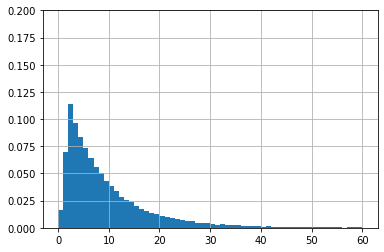

In [35]:
blunder_60 = db[(db['score'] == 'blunder' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
len(blunder_60)

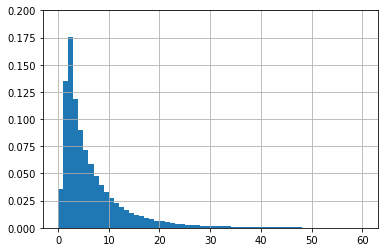

1228829

In [36]:
blunder_60 = db[(db['TimeControl'] == '300+0') & (db['delta_time']<= 60) & (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
len(blunder_60)

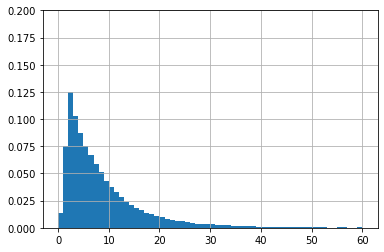

159395

In [37]:
blunder_60 = db[(db['score'] == 'mistake' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
# c = blunder_60['delta_time'].hist(bins = 60, density = True)
histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
len(blunder_60)

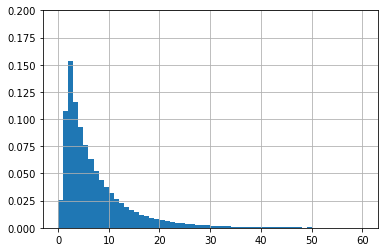

157535

In [38]:
blunder_60 = db[(db['score'] == 'dubious move' )&( db['TimeControl'] == '300+0') & (db['delta_time']<= 60)& (db['move'] > 4) & (db['delta_time']>= 0) ]
histogram(blunder_60['delta_time'],bins=60,ylim=(0,0.2))
len(blunder_60)

prawdopodobienstwo popełenienia błedu w zależności od ruchu dla 300+0

In [39]:

m = db[db['TimeControl']=='300+0'][['score','move','Result']].groupby(['move','score']).count().reset_index()
m

,move,score,Result
0,1.0,0,44169
1,1.0,dubious move,579
2,1.0,mistake,50
3,2.0,0,39693
4,2.0,blunder,43
...,...,...,...
380,107.0,0,2
381,108.0,0,2
382,109.0,0,2
383,110.0,0,2


In [40]:
m2 = pd.merge(m,m.groupby('move').sum().reset_index(),how='left', on='move')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [41]:
m2[m2['score']=='blunder'][['score','move','prob']]

,score,move,prob
4,blunder,2.0,0.000960
8,blunder,3.0,0.004487
12,blunder,4.0,0.011746
16,blunder,5.0,0.019017
20,blunder,6.0,0.026870
...,...,...,...
358,blunder,95.0,0.086957
361,blunder,96.0,0.055556
366,blunder,98.0,0.066667
369,blunder,99.0,0.142857


<AxesSubplot:xlabel='move'>

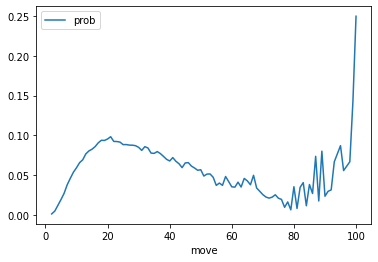

In [42]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='prob')

<AxesSubplot:xlabel='move'>

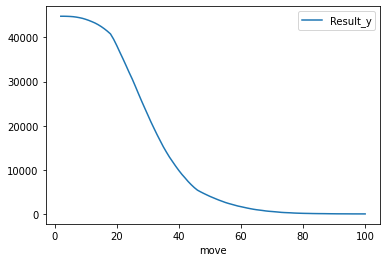

In [43]:
m2[m2['score']=='blunder'][['move','prob','Result_y']].plot(x='move',y='Result_y')


prawdopodobienstwo popełenienia błedu w zależności od czasu dla 300+0

In [62]:
m = db[(db['TimeControl']=='300+0') & (db['delta_time']>=0)& (db['delta_time']<=60)][['score','delta_time','Result']].groupby(['delta_time','score']).count().reset_index()
m

,delta_time,score,Result
0,0.0,0,17356
1,0.0,blunder,313
2,0.0,dubious move,1059
3,0.0,mistake,480
4,1.0,0,33335
...,...,...,...
239,59.0,mistake,5
240,60.0,0,14
241,60.0,blunder,2
242,60.0,dubious move,4


In [63]:
m2 = pd.merge(m,m.groupby('delta_time').sum().reset_index(),how='left', on='delta_time')
m2['prob'] = m2['Result_x']/m2['Result_y']

In [64]:
m2[m2['score']=='blunder'][['score','delta_time','prob']]

,score,delta_time,prob
1,blunder,0.0,0.016295
5,blunder,1.0,0.030891
9,blunder,2.0,0.041106
13,blunder,3.0,0.056535
17,blunder,4.0,0.062119
...,...,...,...
225,blunder,56.0,0.153846
229,blunder,57.0,0.086957
233,blunder,58.0,0.222222
237,blunder,59.0,0.076923


<AxesSubplot:xlabel='delta_time'>

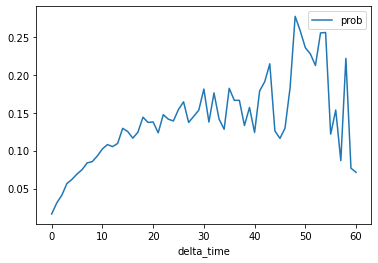

In [65]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='prob')

<AxesSubplot:xlabel='delta_time'>

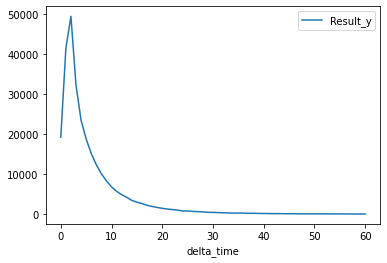

In [66]:
m2[m2['score']=='blunder'][['delta_time','prob','Result_y']].plot(x='delta_time',y='Result_y')


In [57]:
db.groupby('TimeControl').size().reset_index().sort_values(by=0,ascending=False).head(10)

,TimeControl,0
277,600+0,1813841
170,300+0,1409904
265,60+0,1251388
372,900+15,1104458
96,180+0,1057292
180,300+3,941262
101,180+2,745517
44,120+1,448990
364,900+0,69213
73,15+0,46989
